## Explatory Data Anylysis(EDA)

In [15]:
import pandas as pd
import numpy as np 
import scipy
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go


In [9]:
df = pd.read_csv('..\data\clean_merged.csv')


In [17]:
# Ensure DATE is a datetime object
df['DATE'] = pd.to_datetime(df['DATE'])


# Create the interactive line chart
fig = px.line(
    df, 
    x='DATE', 
    y='gold_close', 
    title='Historical Gold Spot Price (1985 - 2025)',
    labels={'DATE': 'Date', 'gold_close': 'Gold Price (USD)'},
    template='plotly_white'  # Gives it a clean, professional look
)

# Customize the line (Making it gold!)
fig.update_traces(line_color='#D4AF37', line_width=2)

# Add a range selector (Optional - adds buttons for 1y, 5y, etc.)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Display the plot
fig.show()

c:\Users\User\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



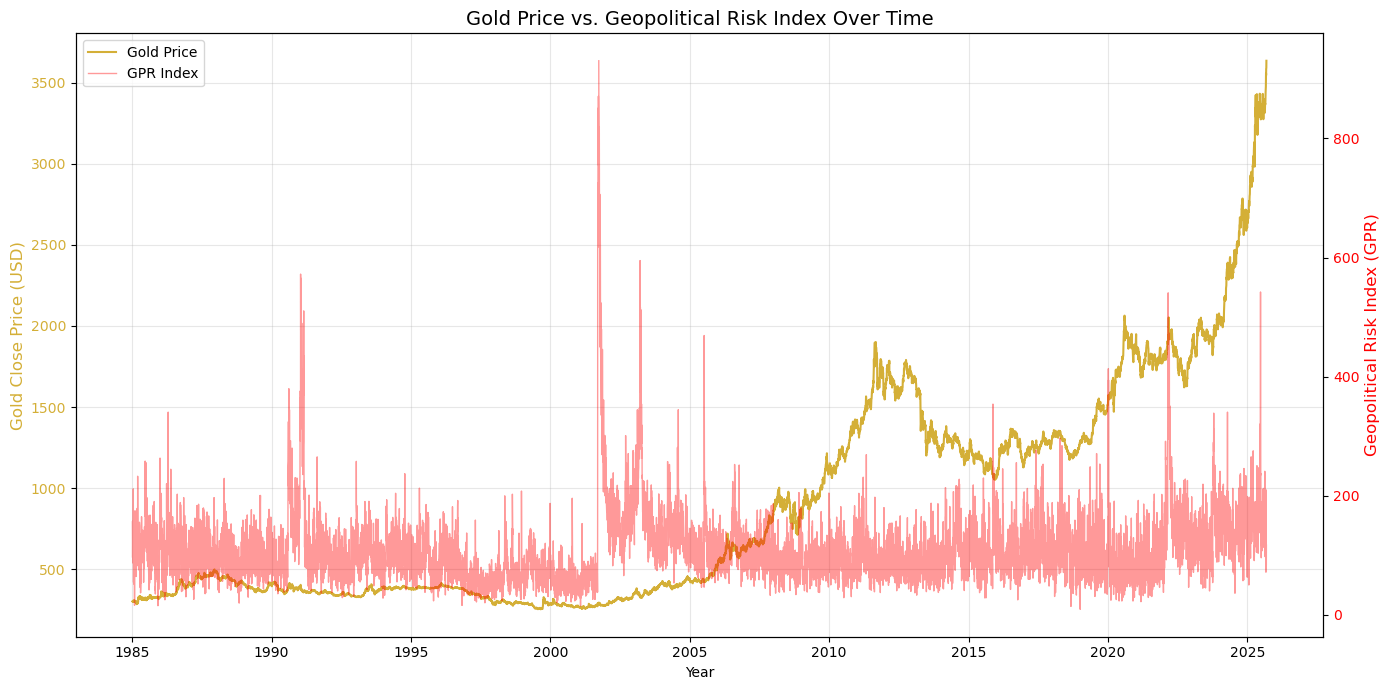

In [18]:
# Ensure gpr_index is numeric (handling any strings/errors)
df['gpr_index'] = pd.to_numeric(df['gpr_index'], errors='coerce')

# Sort by date to ensure the line plot connects correctly
df = df.sort_values('DATE')

# Create the Visualization
plt.figure(figsize=(14, 7))

# Create the first axis (Gold Price)
ax1 = plt.gca()
ax1.plot(df['DATE'], df['gold_close'], color='#D4AF37', label='Gold Price', linewidth=1.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Gold Close Price (USD)', color='#D4AF37', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#D4AF37')

# Create a second axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df['DATE'], df['gpr_index'], color='red', label='GPR Index', alpha=0.4, linewidth=1)
ax2.set_ylabel('Geopolitical Risk Index (GPR)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title('Gold Price vs. Geopolitical Risk Index Over Time', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add a legend for both lines
# We combine the handles from both axes so they appear in one box
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('gold_gpr_timeseries.png')
plt.show()